In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


In [4]:

fear_greed_df = pd.read_csv("fear_greed_index.csv")
historical_df = pd.read_csv("historical_data.csv")


print("Fear & Greed Data:")
display(fear_greed_df.head())

print("\nHistorical Trader Data:")
display(historical_df.head())


print("\nFear & Greed Info:")
fear_greed_df.info()

print("\nHistorical Data Info:")
historical_df.info()


Fear & Greed Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Historical Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Fear & Greed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Historical Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  o

In [4]:

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], format='%Y-%m-%d')
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Extract only the date part from historical data
historical_df['date'] = historical_df['Timestamp IST'].dt.date
historical_df['date'] = pd.to_datetime(historical_df['date'])


merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date', 'classification', 'value']],
    on='date',
    how='left'
)


print("\nMerged Data:")
display(merged_df.head())

missing_sentiment = merged_df['classification'].isna().sum()
print(f"Missing Sentiment Values: {missing_sentiment}")



Merged Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0


Missing Sentiment Values: 6


In [5]:
#Summary statistics
print("\nSummary Statistics for Closed PnL:")
print(merged_df['Closed PnL'].describe())

print("\nSentiment Counts:")
print(merged_df['classification'].value_counts())



Summary Statistics for Closed PnL:
count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64

Sentiment Counts:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


C:\Users\Ansh Kaushik\AppData\Local\Temp\ipykernel_19988\3599795355.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, ci=None, palette='viridis')
C:\Users\Ansh Kaushik\AppData\Local\Temp\ipykernel_19988\3599795355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, ci=None, palette='viridis')


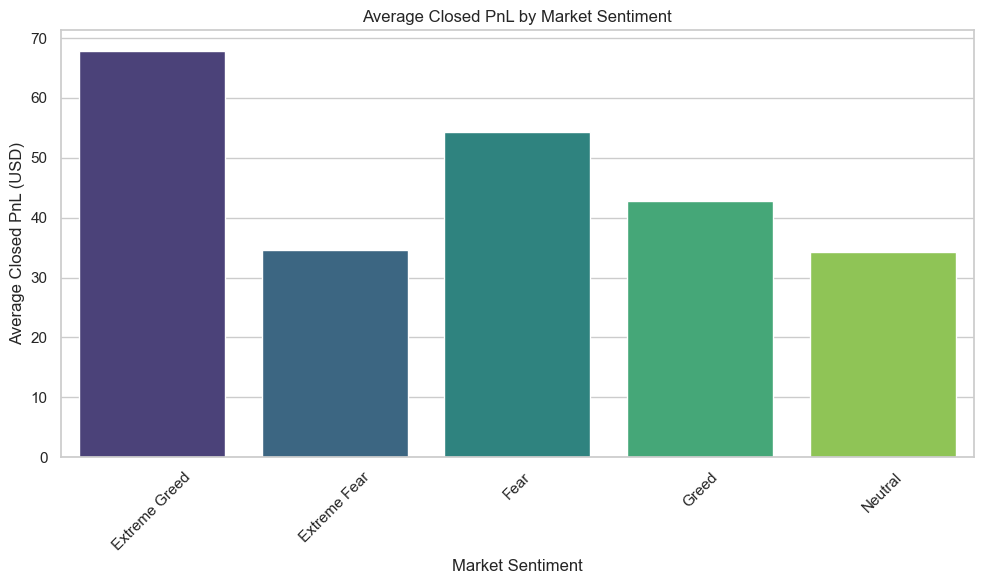

C:\Users\Ansh Kaushik\AppData\Local\Temp\ipykernel_19988\3599795355.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Size USD', estimator=np.mean, ci=None, palette='mako')
C:\Users\Ansh Kaushik\AppData\Local\Temp\ipykernel_19988\3599795355.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Size USD', estimator=np.mean, ci=None, palette='mako')


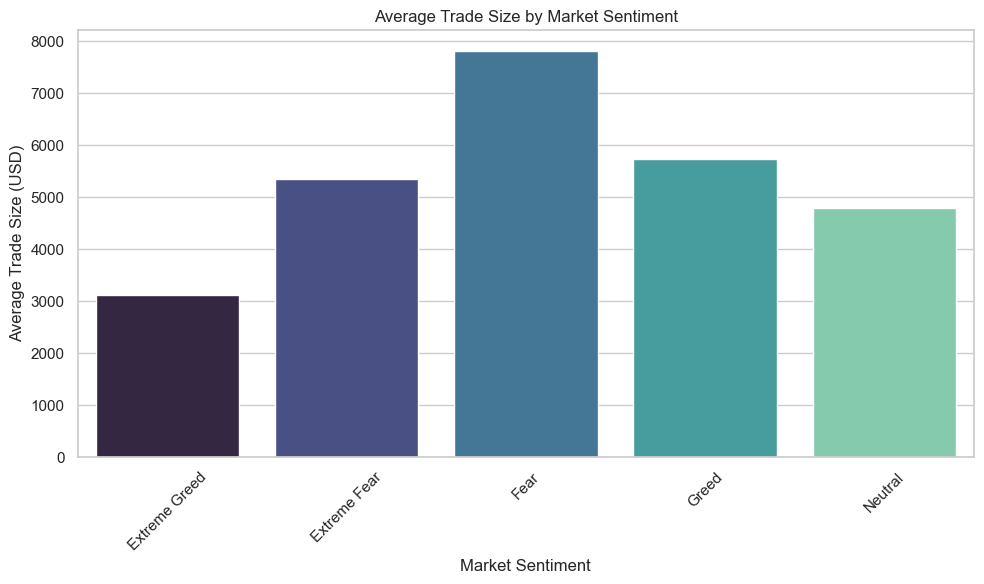

C:\Users\Ansh Kaushik\AppData\Local\Temp\ipykernel_19988\3599795355.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_rate, x='classification', y='Win', palette='coolwarm')


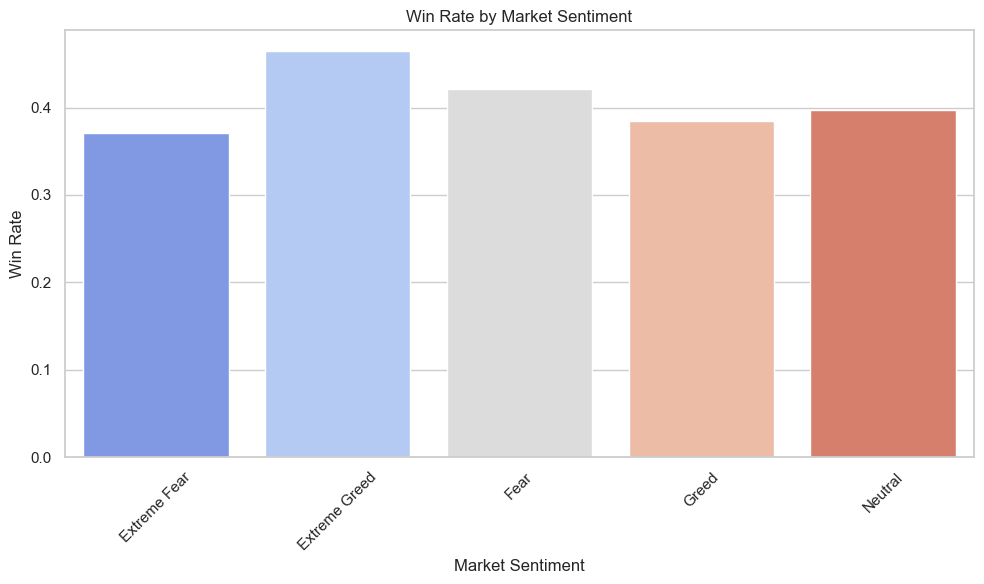

In [6]:
# Average Closed PnL by Market Sentiment
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, ci=None, palette='viridis')
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Average Closed PnL (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Average Position Size (USD) by Market Sentiment
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='classification', y='Size USD', estimator=np.mean, ci=None, palette='mako')
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Win Rate by Market Sentiment (PnL > 0)
merged_df['Win'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification')['Win'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=win_rate, x='classification', y='Win', palette='coolwarm')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation between Sentiment Value and Closed PnL: 0.0081


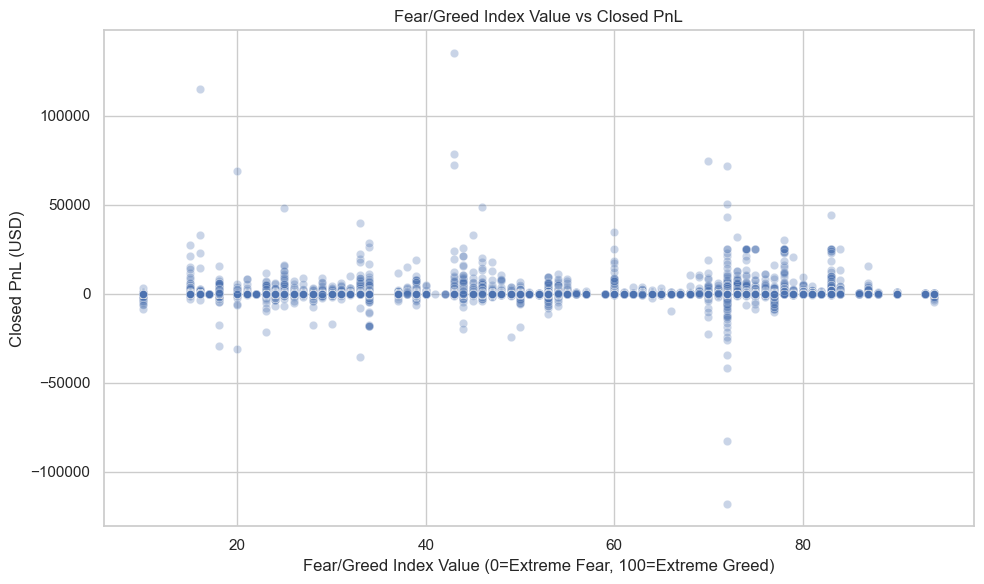

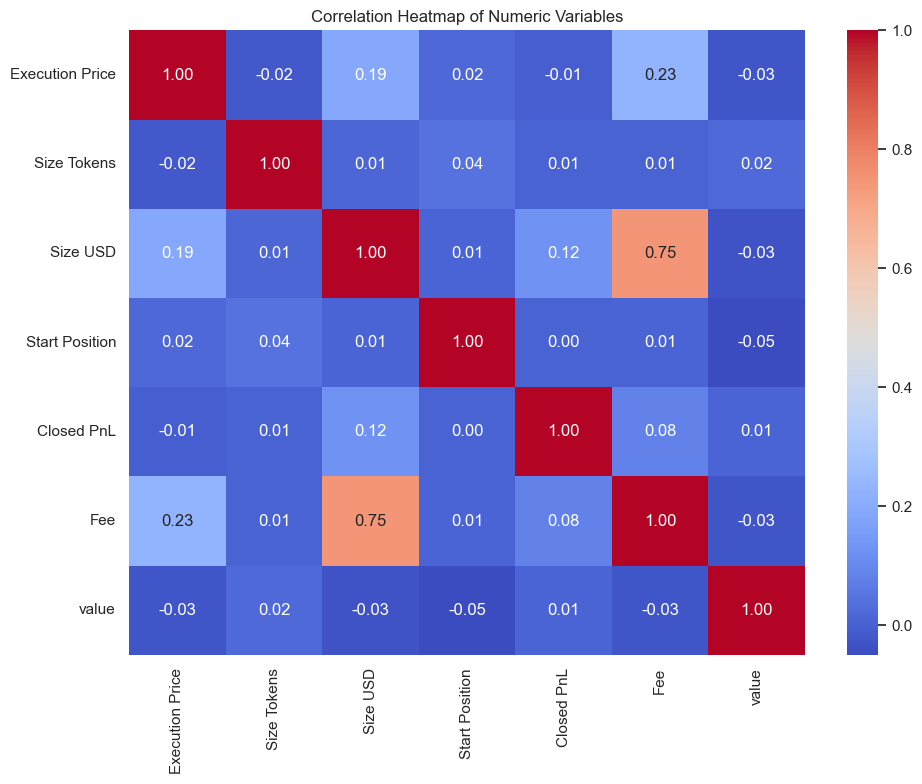

In [7]:
#  Correlation Analysis

# Correlation between sentiment value and Closed PnL
corr_value_pnl = merged_df[['value', 'Closed PnL']].corr().iloc[0,1]
print(f"Correlation between Sentiment Value and Closed PnL: {corr_value_pnl:.4f}")

# Scatter plot of sentiment value vs Closed PnL
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', alpha=0.3)
plt.title("Fear/Greed Index Value vs Closed PnL")
plt.xlabel("Fear/Greed Index Value (0=Extreme Fear, 100=Extreme Greed)")
plt.ylabel("Closed PnL (USD)")
plt.tight_layout()
plt.show()

#  Correlation heatmap for numeric columns
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Order ID', 'Trade ID', 'Timestamp'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()
